# GATE SIMULATION
###                              data preprocessing
                                                 made by Yangsuseong

In [1]:
import os, glob, csv, codecs
import shutil
import re
import itertools
import math

## 파일 골라내기

In [2]:
#dat_dir = input("Insert Directory : ")
dat_dir = r"C:\Users\BraveHong\Documents\gate_git5\test\right_Coincidence"

dat_file_list = glob.glob(dat_dir + '/*.txt')
dat_file_list.sort()
print(dat_file_list)
print(dat_file_list[0][-23:])

['C:\\Users\\BraveHong\\Documents\\gate_git5\\test\\right_Coincidence\\right_Coincidences.txt']
\right_Coincidences.txt


## 파일 읽어들여서 x,y,z 축 값만 남기고 다 버릴거야
    9, 10, 11, 32,33,34 번째 정보
    인덱스로는 8,9,10  31,32,33
        dat_list 리스트에 저장(x1,y1,z1,x2,y2,z2)

In [3]:
# 리스트 청크 함수 (리스트, 원하는 길이)
# 이거 하고나면 차원이 하나가 더 생겨서 언패킹함수를 사용하여 차원축소를 해야함
def chunks(l, n):
    n = max(1, n)
    return (l[i:i+n] for i in range(0, len(l), n))

In [4]:
# 언패킹(차원 축소)을 위한 함수
def chain(*iterables):
    # chain('ABC', 'DEF') --> ['A', 'B', 'C', 'D', 'E', 'F']
    for it in iterables:
        for element in it:
            yield element


In [5]:
dat_list_all = []
dat_list_pre = []
dat_list = []
dat_list_xyz = []


#print("--------------" + dat_file_list[i]) + "----------------")
print(str(len(dat_file_list)) + "개의 파일을 변환합니다.")
for i in range(len(dat_file_list)):
    idx = 0
    print(str(i+1) + "번째 파일")
    txt_data = open(dat_file_list[i],'r')
    for j in txt_data:
        j = " ".join(j.split())
        j = j.split(" ")
        dat_list_all.append(j)
        #print(dat_list_all)

1개의 파일을 변환합니다.
1번째 파일


In [6]:
        
dat_len = len(dat_list_all) - 1
    
for i in range(len(dat_list_all) -1):
    #print(i)
    dat_list_pre.append(dat_list_all[i][8])
    dat_list_pre.append(dat_list_all[i][9])
    dat_list_pre.append(dat_list_all[i][10])
    dat_list_pre.append(dat_list_all[i][31])
    dat_list_pre.append(dat_list_all[i][32])
    dat_list_pre.append(dat_list_all[i][33])
        
dat_list.append(list(chunks(dat_list_pre, 3)))
dat_list = list(itertools.chain(*dat_list))
dat_list_xyz.append(list(chunks(dat_list,2)))
dat_list_xyz = list(itertools.chain(*dat_list_xyz))
    
print("Finish")
txt_data.close()

Finish


## 이제 x,y,z 값을 가지고 각 디텍터 번호에 대표 값으로 변경시켜주는 작업을 할거야
    
    <데이터가 저장된 리스트 정보>
    dat_list_xyz[ Coincidence Num, Single(0 or 1), xyz(0 or 1 or 2) ]
    
        ex) 첫번째 coincidence에서 싱글1의 z값을 보려고 한다.
               dat_list_xyz[0][0][2]
            
                    '-1.603e-03'


    필요한 자료 : 각 디텍터의 좌표 및 범위, 각 디텍터의 대표값
    54개의 큰 if문(x좌표)을 만들고 그 안에서 모든 경우의 수를 만들자

## 평균화 작업을 하기 전에 10의 제곱수(e+01 or e+02)들을 숫자로 바꾸는 작업을 진행해야한다.
    기본단위가 mm이기 떄문에 0.1 곱해주는 작업까지 진행
    ex) -4.389e+02    -->    -43.89 

In [7]:
#print(dat_list_xyz[0][0][0][:-4])
for i in range(dat_len):
    for j in range(2):
        for k in range(3):
            if(str(dat_list_xyz[i][j][k][-4:]) == "e-06"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-6) * 0.1)
                #print("e-06 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e-05"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-5)* 0.1)
                #print("e-05 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e-04"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-4)* 0.1)
                #print("e-04 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e-03"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-3)* 0.1)
                #print("e-03 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e-02"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-2)* 0.1)
                #print("e-02 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e-01"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-1)* 0.1)
                #print("e-01 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e+00"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4])* 0.1)
                #print("e+00 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e+01"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10)* 0.1)
                #print("e+01 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e+02"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**2)* 0.1)
                #print("e+02 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e+03"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**3)* 0.1)
                #print("e+03 complete")
print("Complete")                

Complete


## 제대로 바뀌었는지 확인 한번 하고

In [8]:
float(dat_list_xyz[0][0][0])

43.79

In [9]:
# x,y,z 값 확인용 함수
def print_xyz(x, y, z):
    print("x : " + x + ",    y : " + y +  ",    z : " + z)

In [10]:
print_xyz(dat_list_xyz[0][0][0], dat_list_xyz[0][0][1], dat_list_xyz[0][0][2])

x : 43.79,    y : 8.469,    z : -0.00015300000000000003


---

# 디텍터의 각 좌표들을 구하자

# Detector 번호(Crystal)에 맞는 중심(대표)값을 배열로 만들자
    지금은 3x3 디텍터 모델에 맞는 함수를 만들었다.
    크리스탈의 갯수를 받아서 배열을 생성하는 함수도 생각해보자
    
    <함수의 인자들>
        find_xyz_center(원점으로부터의 거리, 크리스탈의 x축 길이, 크리스탈의 y축 길이, 크리스탈의 z축 길이)

In [11]:
# 각 크리스탈의 중심값을 얻어내기위한 함수 (3x3)
# find_xyz_center(디텍터 갯수, 크리스탈의 x축 갯수, 크리스탈의 y축 갯수, 크리스탈의 z축 갯수, 원점으로부터의 거리, 크리스탈의 x축 길이, 크리스탈의 y축 길이, 크리스탈의 z축 길이)
def YSS_find_xyz_center(detector_amount, crystal_x_amount, crystal_y_amount, crystal_z_amount, r, x_len, y_len, z_len,):
    crystal_x_num = int((int(crystal_x_amount)/2))
    
    
    result = []
    for i in range(int(detector_amount)):
        detector = []
        crystal = []
        crystal_z_num = int((int(crystal_z_amount)/2))
        for j in range(int(crystal_z_amount)):
            
            crystal_y_num = int((int(crystal_y_amount)/2))
            for k in range(int(crystal_y_amount)):
                crystal.append([r + (x_len/2), (y_len * crystal_y_num), (z_len * crystal_z_num)])
                crystal_y_num = crystal_y_num - 1
            crystal_z_num = crystal_z_num - 1
        detector.append(crystal)
        result.append(detector)
    result = list(itertools.chain(*result))
    detector_rot = result
    result = []
    
    detector_num = 0
    for i in range(int(detector_amount)):
        det_rot = []
        for j in range(len(detector_rot[i])):
            det_rot.append([format((detector_rot[i][j][0]*math.cos(((360/detector_amount)*detector_num)*math.pi/180)) - (detector_rot[i][j][1]*math.sin(((360/detector_amount)*detector_num)*math.pi/180)),".3f"),\
                           format((detector_rot[i][j][0]*math.sin(((360/detector_amount)*detector_num)*math.pi/180)) + (detector_rot[i][j][1]*math.cos(((360/detector_amount)*detector_num)*math.pi/180)),".3f"),\
                           format(detector_rot[i][j][2],".3f")])
        detector_num += 1
        result.append(det_rot)
    
            
    
    return result

In [12]:
# 함수 돌리기 (detector_num, crystal_x_amount, crystal_y_amount, crystal_z_amount, r길이, x_len, y_len, z_len)

crystal_location = YSS_find_xyz_center(6, 1, 3, 3, 44, 3, 11, 13)

print(crystal_location[0])

[['45.500', '11.000', '13.000'], ['45.500', '0.000', '13.000'], ['45.500', '-11.000', '13.000'], ['45.500', '11.000', '0.000'], ['45.500', '0.000', '0.000'], ['45.500', '-11.000', '0.000'], ['45.500', '11.000', '-13.000'], ['45.500', '0.000', '-13.000'], ['45.500', '-11.000', '-13.000']]


# 이제 Detector 번호(Crystal)의 중심값을 받아 각 모서리의 좌표를 얻어오는 함수를 만들자
    이 정보를 이용하여 x,y,z 축의 범위를 지정해줄것이다.
    
    crystal_location[0][0][0]  -->  1번 디텍터의 1번 디텍터의 x좌표

In [13]:
# 각 디텍터의 중심값을 받아와 크리스탈의 모서리의 좌표를 구하는 함수
def find_cristal_edge(x, y, z, x_len, y_len, z_len):
    x = float(x)
    y = float(y)
    z = float(z)
    x_len = float(x_len)
    y_len = float(y_len)
    z_len = float(z_len)
    edge_a1 = [x-(x_len/2), y+(y_len/2), z-(z_len/2)]
    edge_b1 = [x-(x_len/2), y+(y_len/2), z+(z_len/2)]
    edge_c1 = [x-(x_len/2), y-(y_len/2), z-(z_len/2)]
    edge_d1 = [x-(x_len/2), y-(y_len/2), z+(z_len/2)]
    edge_a2 = [x+(x_len/2), y+(y_len/2), z-(z_len/2)]
    edge_b2 = [x+(x_len/2), y+(y_len/2), z+(z_len/2)]
    edge_c2 = [x+(x_len/2), y-(y_len/2), z-(z_len/2)]
    edge_d2 = [x+(x_len/2), y-(y_len/2), z+(z_len/2)]
    
    
    crystal_edge = [edge_a1, edge_b1, edge_c1, edge_d1, edge_a2, edge_b2, edge_c2, edge_d2]
    #print(crystal_edge)
    return crystal_edge

## 엣지좌표구해서 회전까지 한번에 하려했는데... 순서때문에 좌표구하는 함수랑 회전변환 함수랑 따로 구현하자

In [14]:
def rotate_edge(crystal_edge, detector_num):
    rotate_crystal_edge_1 = []
    for i in range(detector_num):
        for j in range(len(crystal_edge)):
            for k in range(len(crystal_edge[j])):
                rotate_crystal_edge_1.append([(crystal_edge[j][k][0]*math.cos(((360/detector_num))*i*math.pi/180)) - (crystal_edge[j][k][1]*math.sin(((360/detector_num))*i*math.pi/180)),\
                                               (crystal_edge[j][k][0]*math.sin(((360/detector_num))*i*math.pi/180)) + (crystal_edge[j][k][1]*math.cos(((360/detector_num))*i*math.pi/180)),\
                                                crystal_edge[j][k][2]])
            
    return rotate_crystal_edge_1

In [15]:
def rotate_edge_yss(x, y, z, angle):
    rotate_crystal_edge_1 = []
    x = float(x)
    y = float(y)
    z = float(z)
    rotate_crystal_edge_1.append([(x*math.cos(angle*math.pi/180)) - (y*math.sin(angle*math.pi/180)),\
                               (x*math.sin(angle*math.pi/180)) + (y*math.cos(angle*math.pi/180)),\
                                z])
    return rotate_crystal_edge_1


# 이제 실행하자
    크리스탈 센터값 계산 함수(1번 디텍터만 계산 후 회전변환)

In [16]:
origin_crystal_edge = []
for j in range(len(crystal_location[0])):
    origin_crystal_edge.append(find_cristal_edge(crystal_location[0][j][0],\
                          crystal_location[0][j][1],\
                          crystal_location[0][j][2],\
                          3, 11, 13))  
    
print(origin_crystal_edge[8])

[[44.0, -5.5, -19.5], [44.0, -5.5, -6.5], [44.0, -16.5, -19.5], [44.0, -16.5, -6.5], [47.0, -5.5, -19.5], [47.0, -5.5, -6.5], [47.0, -16.5, -19.5], [47.0, -16.5, -6.5]]


    회전변환 시작

In [17]:
rotate_crystal_edge = rotate_edge(origin_crystal_edge, 6)

# 모서리 좌표 리스트를 차원을 늘려서 디텍터별로 나누자
rotate_crystal_edge_chunks_1 = []
rotate_crystal_edge_chunks = []
rotate_crystal_edge_chunks_1.append(list(chunks(rotate_crystal_edge, 8)))
rotate_crystal_edge_chunks_1 = list(itertools.chain(*rotate_crystal_edge_chunks_1))
rotate_crystal_edge_chunks.append(list(chunks(rotate_crystal_edge_chunks_1, 9)))
rotate_crystal_edge_chunks = list(itertools.chain(*rotate_crystal_edge_chunks))


---

## 이제 대표값으로 바꾸자
--- 


crystal_location[디텍터 번호][크리스탈 번호][xyz 인덱스]

rotate_crystal_edge[ 크리스탈 번호 ][ 모서리번호(a1,b1,c1,d1,a2,b2,c2,d2) ][ xyz 인덱스 ]

rotate_crystal_edge_chunks[디텍터 번호][크리스탈 번호][모서리 위치][xyz 좌표(0,1,2)]

In [18]:
rotate_crystal_edge_chunks[0][0]

[[44.0, 16.5, 6.5],
 [44.0, 16.5, 19.5],
 [44.0, 5.5, 6.5],
 [44.0, 5.5, 19.5],
 [47.0, 16.5, 6.5],
 [47.0, 16.5, 19.5],
 [47.0, 5.5, 6.5],
 [47.0, 5.5, 19.5]]

In [19]:
dat_list_xyz[0]

[['43.79', '8.469', '-0.00015300000000000003'],
 ['-43.470000000000006', '-9.626', '0.03758']]

In [20]:
# 데이터 범위를 디텍터 갯수에 맞게 미리 나누어내는 방법
# find_detector(원본 데이터, 모서리값, 디텍터 갯수)


def find_detector(dat_list, rotate_crystal_edge_chunks):
    detector_number = []
    
    for l in range(len(dat_list)):
        detector_num = []
        sort_data_1 = []
        for m in range(len(dat_list[l])):
                    # 여기까지 데이터 읽어오기
            for i in range(len(rotate_crystal_edge_chunks)):
                
                x_max = -1000
                x_min = 1000
                y_max = -1000
                y_min = 1000
                for j in range(len(rotate_crystal_edge_chunks[i])):
                    for k in range(len(rotate_crystal_edge_chunks[i][j])):
                        if(float(rotate_crystal_edge_chunks[i][j][k][0]) > x_max):
                            x_max = rotate_crystal_edge_chunks[i][j][k][0]
                        if(float(rotate_crystal_edge_chunks[i][j][k][0]) < x_min):
                            x_min = rotate_crystal_edge_chunks[i][j][k][0]
                        if(float(rotate_crystal_edge_chunks[i][j][k][1]) > y_max):
                            y_max = rotate_crystal_edge_chunks[i][j][k][1]
                        if(float(rotate_crystal_edge_chunks[i][j][k][1]) < y_min):
                            y_min = rotate_crystal_edge_chunks[i][j][k][1]
                #print(str(i)+" : " + str(x_min) + " < x < " + str(x_max) + ", " + str(y_min) + " < y < " + str(y_max))
                if(float(dat_list[l][m][0])>x_min and float(dat_list[l][m][0])<x_max):
                    if(float(dat_list[l][m][1])>y_min and float(dat_list[l][m][1])<y_max):    
                        detector_num.append(i)
                        if(m == 1):
                            sort_data_1.append(dat_list[l])
        
    # 버려지는 데이터들이 있어서 쌍이 있는 데이터들만 남기겠다.
        if(len(detector_num)==2):
            sort_data.append(sort_data_1)
            detector_number.append(detector_num)    
        
    return detector_number

# 데이터 범위를 디텍터 갯수에 맞게 미리 나누어내는 방법
# find_detector(원본 데이터, 모서리값, 디텍터 갯수)
def find_detector(dat_list, rotate_crystal_edge_chunks):
    detector_num = []
    for i in range(len(rotate_crystal_edge_chunks)):
        detector_number = []
        x_max = -1000
        x_min = 1000
        y_max = -1000
        y_min = 1000
        for j in range(len(rotate_crystal_edge_chunks[i])):
            for k in range(len(rotate_crystal_edge_chunks[i][j])):
                if(float(rotate_crystal_edge_chunks[i][j][k][0]) > x_max):
                    x_max = rotate_crystal_edge_chunks[i][j][k][0]
                if(float(rotate_crystal_edge_chunks[i][j][k][0]) < x_min):
                    x_min = rotate_crystal_edge_chunks[i][j][k][0]
                if(float(rotate_crystal_edge_chunks[i][j][k][1]) > y_max):
                    y_max = rotate_crystal_edge_chunks[i][j][k][1]
                if(float(rotate_crystal_edge_chunks[i][j][k][1]) < y_min):
                    y_min = rotate_crystal_edge_chunks[i][j][k][1]
        else:
            #print("x_max = " + str(x_max) + "   x_min = " + str(x_min) + "   y_max = " + str(y_max) + "   y_min = " + str(y_min))
            #print(str(i)+" : " + str(x_min) + " < x < " + str(x_max) + ", " + str(y_min) + " < y < " + str(y_max))
            for l in range(len(dat_list)):
                for m in range(len(dat_list[l])):
                    # 여기까지 데이터 읽어오기
                    if(float(dat_list[l][m][0])>x_min and float(dat_list[l][m][0])<x_max):
                        if(float(dat_list[l][m][1])>y_min and float(dat_list[l][m][1])<y_max):    
                            detector_number.append(i)
    return detector_num

In [21]:
# 함수 실행
sort_data = []
detector_number = find_detector(dat_list_xyz, rotate_crystal_edge_chunks)
#detector_number = list(itertools.chain(*detector_number))
#sort_data = list(itertools.chain(*sort_data)

In [22]:
detector_number

[[3, 0],
 [4, 1],
 [2, 5],
 [2, 5],
 [4, 1],
 [4, 0],
 [5, 2],
 [1, 4],
 [5, 2],
 [4, 1],
 [2, 5],
 [2, 5],
 [2, 5],
 [2, 5],
 [2, 5],
 [1, 4],
 [1, 4],
 [2, 5],
 [1, 4],
 [4, 1],
 [4, 1],
 [4, 1],
 [1, 4],
 [1, 4],
 [2, 5],
 [1, 4],
 [4, 1],
 [4, 1],
 [1, 4],
 [2, 5],
 [4, 2],
 [3, 0],
 [1, 4],
 [4, 1],
 [2, 5],
 [4, 1],
 [1, 4],
 [1, 4],
 [5, 1],
 [2, 5],
 [3, 0],
 [5, 2],
 [2, 5],
 [2, 5],
 [5, 2],
 [1, 4],
 [4, 1],
 [5, 2],
 [1, 4],
 [4, 1],
 [1, 4],
 [2, 5],
 [1, 4],
 [2, 5],
 [4, 1],
 [4, 1],
 [5, 2],
 [1, 4],
 [5, 2],
 [2, 5],
 [1, 4],
 [4, 1],
 [1, 4],
 [2, 5],
 [4, 1],
 [5, 2],
 [2, 5],
 [4, 1],
 [1, 5],
 [5, 2],
 [4, 1],
 [4, 1],
 [1, 4],
 [2, 5],
 [5, 2],
 [0, 2],
 [5, 2],
 [2, 5],
 [5, 2],
 [1, 4],
 [2, 5],
 [2, 5],
 [2, 5],
 [1, 5],
 [4, 1],
 [1, 4],
 [4, 1],
 [5, 2],
 [4, 1],
 [2, 5],
 [5, 2],
 [2, 5],
 [1, 3],
 [4, 1],
 [1, 5],
 [2, 5],
 [1, 4],
 [1, 4],
 [5, 2],
 [0, 3],
 [4, 1],
 [5, 2],
 [2, 5],
 [2, 5],
 [2, 5],
 [5, 2],
 [5, 2],
 [1, 4],
 [4, 1],
 [2, 5],
 [1, 5],
 

In [23]:
# 차원 축소 작업
detector_num = detector_number
detector_num = list(itertools.chain(*detector_num))
sort_dat = sort_data
sort_dat = list(itertools.chain(*sort_dat))
sort_dat = list(itertools.chain(*sort_dat))

In [24]:
#sort_data = list(itertools.chain(*sort_data))
print(sort_dat[0])

['-44.85000000000001', '-7.929000000000001', '-0.00017820000000000002']


In [25]:
sort_data

[[[['-44.85000000000001', '-7.929000000000001', '-0.00017820000000000002'],
   ['45.78', '7.441', '-1.5730000000000002']]],
 [[['-22.96', '-36.72', '-0.018420000000000002'],
   ['26.580000000000002', '33.96', '0.0001519']]],
 [[['-27.490000000000006', '33.839999999999996', '0.3477'],
   ['31.52', '-32.51', '-0.1875']]],
 [[['-15.629999999999999', '42.52', '-0.07455'],
   ['20.09', '-38.96', '-0.01614']]],
 [[['-25.17', '-35.31', '-0.00016590000000000002'],
   ['29.33', '32.7', '-0.3332']]],
 [[['-31.5', '-31.25', '17.57'], ['44.03', '7.407', '0.08521000000000001']]],
 [[['31.57', '-34.64', '0.05398'], ['-12.48', '41.97', '-12.96']]],
 [[['13.05', '44.25', '-3.8890000000000002'],
   ['-8.326', '-44.67', '-0.00031130000000000003']]],
 [[['19.94', '-38.730000000000004', '0.00409'],
   ['-15.05', '41.230000000000004', '-0.0027480000000000004']]],
 [[['-7.817', '-44.93000000000001', '0.06226000000000001'],
   ['13.65', '41.95', '-0.0646']]],
 [[['-8.345', '45.35', '0.141'],
   ['14.18', '-4

In [26]:
sort_dat

[['-44.85000000000001', '-7.929000000000001', '-0.00017820000000000002'],
 ['45.78', '7.441', '-1.5730000000000002'],
 ['-22.96', '-36.72', '-0.018420000000000002'],
 ['26.580000000000002', '33.96', '0.0001519'],
 ['-27.490000000000006', '33.839999999999996', '0.3477'],
 ['31.52', '-32.51', '-0.1875'],
 ['-15.629999999999999', '42.52', '-0.07455'],
 ['20.09', '-38.96', '-0.01614'],
 ['-25.17', '-35.31', '-0.00016590000000000002'],
 ['29.33', '32.7', '-0.3332'],
 ['-31.5', '-31.25', '17.57'],
 ['44.03', '7.407', '0.08521000000000001'],
 ['31.57', '-34.64', '0.05398'],
 ['-12.48', '41.97', '-12.96'],
 ['13.05', '44.25', '-3.8890000000000002'],
 ['-8.326', '-44.67', '-0.00031130000000000003'],
 ['19.94', '-38.730000000000004', '0.00409'],
 ['-15.05', '41.230000000000004', '-0.0027480000000000004'],
 ['-7.817', '-44.93000000000001', '0.06226000000000001'],
 ['13.65', '41.95', '-0.0646'],
 ['-8.345', '45.35', '0.141'],
 ['14.18', '-44.21000000000001', '-0.0014520000000000002'],
 ['-26.85', 

In [27]:
# 정렬된 데이터와 디텍터 번호를 받아와 티텍터의 회전각만큼 회전변환을 통해 중심값으로 변경시키는 함수
# rotate_detector(정렬된 데이터, 디텍터 번호가 적힌 리스트, 디텍터 갯수)
def rotate_detector(sort_dat, detector_number, detector_num):
    final_dat = []
    angle = float(360/int(detector_num))
    for idx,detector_n in enumerate(detector_number):
        #print(detector_n)
        #print(idx)
        # 먼저 x축과 평행한 디텍터로 옮기는 작업(회전변환)
        
        data = rotate_edge_yss(sort_dat[idx][0],sort_dat[idx][1],sort_dat[idx][2],detector_num-(angle*detector_n))
        # 여기까지는 문제 없음 확인
        #print(data)
        #data = [format((float(sort_dat[idx][0])*math.cos((angle*(detector_num-int(detector_n)))*math.pi/180))\
         #              -(float(sort_dat[idx][1])*math.sin((angle*(detector_num-int(detector_n)))*math.pi/180)),".3f"),\
        #format((float(sort_dat[idx][0])*math.sin((angle*(detector_num-int(detector_n)))*math.pi/180))\
         #      +(float(sort_dat[idx][1])*math.cos((angle*(detector_num-int(detector_n)))*math.pi/180)),".3f"),\
        #format(float(sort_dat[idx][2]))]
        
        # 이동된 데이터로 크리스탈 번호 결정
        #print("원본 데이터: "+str(sort_dat[idx])+"--> 바뀐 데이터: "+str(data))
        
        for i in range(len(origin_crystal_edge)):
            x_min = float(origin_crystal_edge[i][0][0])
            x_max = float(origin_crystal_edge[i][4][0])
            y_min = float(origin_crystal_edge[i][2][1])
            y_max = float(origin_crystal_edge[i][0][1])
            z_min = float(origin_crystal_edge[i][0][2])
            z_max = float(origin_crystal_edge[i][1][2])
            
            if(float(data[0][0])>=x_min and float(data[0][0])<x_max):
                if(float(data[0][1])>=y_min and float(data[0][1])<y_max):
                    if(float(data[0][2])>=z_min and float(data[0][2])<z_max):
                        #print(str(i)+" : " + str(x_min) + " < x < " + str(x_max) + ", " + str(y_min) + " < y < " + str(y_max))
                        after_data = rotate_edge_yss(crystal_location[0][i][0],crystal_location[0][i][1],crystal_location[0][i][2],angle*detector_n)
    
                        #after_data = [format(float(crystal_location[0][i][0])*math.cos((angle*int(detector_n))*math.pi/180)\
                       #-(float(crystal_location[0][i][1])*math.sin((angle*int(detector_n))*math.pi/180)),".3f"),\
                        #format((float(crystal_location[0][i][0])*math.sin((angle*int(detector_n))*math.pi/180))\
                       #+(float(crystal_location[0][i][1])*math.cos((angle*int(detector_n))*math.pi/180)),".3f"),\
                        #format(float(crystal_location[0][i][2]))]
                         
                        final_dat.append(after_data)
                        
        
        
                        
                    
    return final_dat
                
            
            
            
        
        
    

In [28]:
len(origin_crystal_edge)

9

In [29]:
len(crystal_location[0])

9

In [30]:
sort_dat

[['-44.85000000000001', '-7.929000000000001', '-0.00017820000000000002'],
 ['45.78', '7.441', '-1.5730000000000002'],
 ['-22.96', '-36.72', '-0.018420000000000002'],
 ['26.580000000000002', '33.96', '0.0001519'],
 ['-27.490000000000006', '33.839999999999996', '0.3477'],
 ['31.52', '-32.51', '-0.1875'],
 ['-15.629999999999999', '42.52', '-0.07455'],
 ['20.09', '-38.96', '-0.01614'],
 ['-25.17', '-35.31', '-0.00016590000000000002'],
 ['29.33', '32.7', '-0.3332'],
 ['-31.5', '-31.25', '17.57'],
 ['44.03', '7.407', '0.08521000000000001'],
 ['31.57', '-34.64', '0.05398'],
 ['-12.48', '41.97', '-12.96'],
 ['13.05', '44.25', '-3.8890000000000002'],
 ['-8.326', '-44.67', '-0.00031130000000000003'],
 ['19.94', '-38.730000000000004', '0.00409'],
 ['-15.05', '41.230000000000004', '-0.0027480000000000004'],
 ['-7.817', '-44.93000000000001', '0.06226000000000001'],
 ['13.65', '41.95', '-0.0646'],
 ['-8.345', '45.35', '0.141'],
 ['14.18', '-44.21000000000001', '-0.0014520000000000002'],
 ['-26.85', 

In [31]:
final_output = rotate_detector(sort_dat, detector_num, 6)

In [32]:
# 차원 축소 작업
final_data = final_output
final_data = list(itertools.chain(*final_data))
final_data_1=[]
final_data_1.append(list(chunks(final_data, 2)))
final_data_1 = list(itertools.chain(*final_data_1))

In [33]:
final_data_1

[[[45.5, 11.0, 0.0], [-22.74999999999999, 39.404155872191964, 0.0]],
 [[32.27627944162883, -33.90415587219196, 0.0],
  [-13.223720558371163, 44.904155872191964, 0.0]],
 [[22.750000000000004, -39.40415587219196, 0.0],
  [22.750000000000004, -39.40415587219196, 0.0]],
 [[-22.74999999999999, 39.404155872191964, 0.0],
  [22.750000000000004, -39.40415587219196, 0.0]],
 [[-22.74999999999999, 39.404155872191964, 0.0],
  [-22.75000000000002, -39.40415587219194, 0.0]],
 [[-22.75000000000002, -39.40415587219194, 0.0],
  [32.27627944162883, 33.90415587219196, 0.0]],
 [[22.750000000000004, 39.40415587219196, 0.0],
  [-22.75000000000002, -39.40415587219194, 13.0]],
 [[13.223720558371179, 44.90415587219196, 0.0],
  [-32.276279441628844, -33.904155872191936, 0.0]],
 [[32.27627944162883, 33.90415587219196, 0.0],
  [-22.75000000000002, -39.40415587219194, 0.0]],
 [[32.27627944162883, 33.90415587219196, 0.0],
  [22.750000000000004, 39.40415587219196, 0.0]],
 [[22.750000000000004, 39.40415587219196, 0.0]

# 범위별로 정리된 데이터를 받아 값을 중심값으로 변경시켜주는 함수
# 각 디텍터의 데이터를 받아 회전변환을 통해 회전시켜 계산 후 원래대로 돌리기
# normalization(정리된 데이터, 크리스탈 모서리값)
def normalization(output_data, crystal_edge):
    output = []
    for i in range(len(output_data)):
        # i = 디텍터 번호
        for j in range(len(output_data[i])):
            coincidence data
            for k in range(len(crystal_edge)):
                for l in range(len(crystal_edge[k])):
                    for m in range(3):
                        
                    
                
            

In [34]:
len(dat_list_xyz)

436895

In [35]:
41101 + 50862 + 251139 + 107143

450245

In [36]:

x_max = -10
x_min = 10
for k in range(10):
    if(k > x_max):
        x_max = k
    if(k < x_min):
        x_min = k
else:
    print(x_max)
    print(x_min)

9
0


# 데이터 하나당 크리스탈 범위 찾아내어 바꾸는 방법
    --> 크리스탈 범위가 겹치는 부분이 생겨서 문제 발생
# normalization(원본 데이터, 중심값, 모서리값)
def normalization(dat_list_xyz, crystal_location, crystal_edge):
    #print(dat_list_xyz)
    crystal_location = list(itertools.chain(*crystal_location))
    print(len(crystal_location))
    crystal_edge = list(itertools.chain(*crystal_edge))
    #print(crystal_edge)
    ave_xyz_list = []
    
    for i in range(len(dat_list_xyz)):
        #데이터 순서
        
        for j in range(len(dat_list_xyz[i])):
            # 싱글
            #print(dat_list_xyz[i][j])
            crystal_range = []
            
            for l in range(len(crystal_edge)):
            #크리스탈 번호
                #print(crystal_edge)
                xh=0
                xl=0
                yh=0
                yl=0
                zh=0
                zl=0
                for m in range(len(crystal_edge[l])):
                    # 모서리 번호
                    #print(crystal_edge[l][m])
                    x_min = 1000.0
                    x_max = -1000.0
                    y_min = 1000.0
                    y_max = -1000.0
                    z_min = 1000.0
                    z_max = -1000.0
                    # min 과 max 범위가 똑같다? 왜지?
                    if(x_min > float(crystal_edge[l][m][0])):
                        x_min = float(crystal_edge[l][m][0])
                        xl = x_min
                    if(x_max < float(crystal_edge[l][m][0])):
                        x_max = float(crystal_edge[l][m][0])
                        xh=x_max
                    if(y_min > float(crystal_edge[l][m][1])):
                        y_min = float(crystal_edge[l][m][1])
                        yl=y_min
                    if(y_max < float(crystal_edge[l][m][1])):
                        y_max = float(crystal_edge[l][m][1])
                        yh=y_max
                    if(z_min > float(crystal_edge[l][m][2])):
                        z_min = float(crystal_edge[l][m][2])
                        zl=z_min
                    if(z_max < float(crystal_edge[l][m][2])):
                        z_max = float(crystal_edge[l][m][2])
                        zh=z_max
                crystal_range.append([xh,xl,yh,yl,zh,zl])
                if(l == len(crystal_edge)-1):
                    print(crystal_range)
                        
                
                #print("x_max = " + str(x_max) + "   x_min = " + str(x_min) + "   y_max = " + str(y_max) + "   y_min = " + str(y_min) + "   z_max = " + str(z_max) + "   z_min = " + str(z_min))
                
                if(x_min <= float(dat_list_xyz[i][j][0]) and x_max >= float(dat_list_xyz[i][j][0])):
                    if(y_min <= float(dat_list_xyz[i][j][1]) and y_max >= float(dat_list_xyz[i][j][1])):
                        if(z_min <= float(dat_list_xyz[i][j][2]) and z_max >= float(dat_list_xyz[i][j][2])):
                            ave_xyz_list.append([crystal_location[l][0], crystal_location[l][1], crystal_location[l][2]])
                #print(ave_xyz_list)
            #print("-----------------------------")   
            
    
            

    return ave_xyz_list
                            
                
                
        
    

# normalization(원본 데이터, 중심값, 모서리값)
ave_xyz_list = normalization(dat_list_xyz, crystal_location, rotate_crystal_edge_chunks)

소수점 x자리까지 자르는거 하고 single 별로 다시 묶자

In [37]:
dat_list_xyz[0]





[['43.79', '8.469', '-0.00015300000000000003'],
 ['-43.470000000000006', '-9.626', '0.03758']]

In [38]:
# 각 크리스탈의 중심값 찾기 (detector_num, crystal_x_amount, crystal_y_amount, crystal_z_amount, r길이, x_len, y_len, z_len)

crystal_location = YSS_find_xyz_center(6, 1, 3, 3, 44, 3, 11, 13)

print(crystal_location[0])

[['45.500', '11.000', '13.000'], ['45.500', '0.000', '13.000'], ['45.500', '-11.000', '13.000'], ['45.500', '11.000', '0.000'], ['45.500', '0.000', '0.000'], ['45.500', '-11.000', '0.000'], ['45.500', '11.000', '-13.000'], ['45.500', '0.000', '-13.000'], ['45.500', '-11.000', '-13.000']]


In [39]:
# 각 크리스탈의 모서리 값 구하기
origin_crystal_edge = []
for j in range(len(crystal_location[0])):
    origin_crystal_edge.append(find_cristal_edge(crystal_location[0][j][0],\
                          crystal_location[0][j][1],\
                          crystal_location[0][j][2],\
                          3, 11, 13))  
    
print(origin_crystal_edge[8])

[[44.0, -5.5, -19.5], [44.0, -5.5, -6.5], [44.0, -16.5, -19.5], [44.0, -16.5, -6.5], [47.0, -5.5, -19.5], [47.0, -5.5, -6.5], [47.0, -16.5, -19.5], [47.0, -16.5, -6.5]]


In [40]:
# 모서리 회전변환
rotate_crystal_edge = rotate_edge(origin_crystal_edge, 6)

# 모서리 좌표 리스트를 차원을 늘려서 디텍터별로 나누자
rotate_crystal_edge_chunks_1 = []
rotate_crystal_edge_chunks = []
rotate_crystal_edge_chunks_1.append(list(chunks(rotate_crystal_edge, 8)))
rotate_crystal_edge_chunks_1 = list(itertools.chain(*rotate_crystal_edge_chunks_1))
rotate_crystal_edge_chunks.append(list(chunks(rotate_crystal_edge_chunks_1, 9)))
rotate_crystal_edge_chunks = list(itertools.chain(*rotate_crystal_edge_chunks))


# 변수 정리

In [41]:
# 각 크리스탈의 중심좌표
# crystal_location[디텍터 번호][크리스탈 번호]
print(crystal_location[0][0])

['45.500', '11.000', '13.000']


In [42]:
# 각 크리스탈의 모서리 좌표 (a, b, c, d, a', b', c', d')
#  rotate_crystal_edge_chunks[디텍터 번호][크리스탈 번호][모서리 위치]
print(rotate_crystal_edge_chunks[3][0])
print(rotate_crystal_edge_chunks[0][0][0])

[[-44.0, -16.499999999999993, 6.5], [-44.0, -16.499999999999993, 19.5], [-44.0, -5.499999999999995, 6.5], [-44.0, -5.499999999999995, 19.5], [-47.0, -16.499999999999993, 6.5], [-47.0, -16.499999999999993, 19.5], [-47.0, -5.499999999999995, 6.5], [-47.0, -5.499999999999995, 19.5]]
[44.0, 16.5, 6.5]


In [43]:
final_data_1

[[[45.5, 11.0, 0.0], [-22.74999999999999, 39.404155872191964, 0.0]],
 [[32.27627944162883, -33.90415587219196, 0.0],
  [-13.223720558371163, 44.904155872191964, 0.0]],
 [[22.750000000000004, -39.40415587219196, 0.0],
  [22.750000000000004, -39.40415587219196, 0.0]],
 [[-22.74999999999999, 39.404155872191964, 0.0],
  [22.750000000000004, -39.40415587219196, 0.0]],
 [[-22.74999999999999, 39.404155872191964, 0.0],
  [-22.75000000000002, -39.40415587219194, 0.0]],
 [[-22.75000000000002, -39.40415587219194, 0.0],
  [32.27627944162883, 33.90415587219196, 0.0]],
 [[22.750000000000004, 39.40415587219196, 0.0],
  [-22.75000000000002, -39.40415587219194, 13.0]],
 [[13.223720558371179, 44.90415587219196, 0.0],
  [-32.276279441628844, -33.904155872191936, 0.0]],
 [[32.27627944162883, 33.90415587219196, 0.0],
  [-22.75000000000002, -39.40415587219194, 0.0]],
 [[32.27627944162883, 33.90415587219196, 0.0],
  [22.750000000000004, 39.40415587219196, 0.0]],
 [[22.750000000000004, 39.40415587219196, 0.0]

In [44]:
import math
import numpy as np



In [45]:
dist =45.5
dist

# 반지름 변수 대입

45.5

# R PHI THETA를 구하기 위한 함수 

In [46]:
def cal_angle (det1,det2):
    
    det_x1 = det1[0]
    det_y1 = det1[1]
    det_z1 = det1[2]
    det_x2 = det2[0]
    det_y2 = det2[1]
    det_z2 = det2[2]
    det_x1 = float(det_x1)
    det_y1 = float(det_y1)
    det_z1 = float(det_z1)
    det_x2 = float(det_x2)
    det_y2 = float(det_y2)
    det_z2 = float(det_z2)
    a = det_x1 - det_x2
    b = det_y1 - det_y2
    c = det_x2 - det_x1
    d = det_y2 - det_y1
    distance = dist *2 #  두 디텍터 간의 직선 거리 
    theta = math.atan( ( det_z1 - det_z2 )/ distance)
    
    if b == 0 :
        phi = 90*math.pi/180
        radius = det_y1
        
    elif d == 0:
        phi = 90*math.pi/180
        radius = det_y1
        
    else:
        phi = math.atan(- a / b)
        
        if a == 0:
            phi = 0
            radius = det_x1
        else:
            radius = -(b / a) * det_x1 * math.sin(phi) + det_y1 * math.sin(phi)
    
    result = [radius, phi, theta]
    

    return  result


# 데이터를 받아서 record에 기록

In [47]:
a=np.array(final_data_1)

In [48]:
record = []
for i in range(0,len(a)-1):
    record.append(cal_angle(a[i][0],a[i][1]))
        

In [49]:
record

[[27.638118203690706, 1.1764215659493535, 0.0],
 [11.00000000000001, 0.5235987755982987, 0.0],
 [-39.40415587219196, 1.5707963267948966, 0.0],
 [7.105427357601002e-15, 0.5235987755982987, 0.0],
 [-22.750000000000007, -4.0572399536883994e-16, 0.0],
 [5.460252711758628, -0.6438942525262533, 0.0],
 [-1.4210854715202004e-14, -0.5235987755982993, -0.1418970546041639],
 [-11.000000000000009, -0.5235987755982991, 0.0],
 [5.460252711758624, -0.6438942525262533, 0.0],
 [45.5, 1.0471975511965979, 0.0],
 [45.5, 1.0471975511965979, 0.0],
 [23.405394677296073, -1.2844043500802422, 0.0],
 [5.460252711758647, 0.40330329867034465, 0.0],
 [-22.750000000000007, -4.0572399536883994e-16, 0.0],
 [5.460252711758628, -0.40330329867034503, 0.0],
 [5.460252711758647, 0.40330329867034465, 0.0],
 [-18.181891505152002, 0.11251612989187651, 0.0],
 [1.0658141036401503e-14, 0.5235987755982987, 0.0],
 [-18.181891505152002, 0.11251612989187651, 0.0],
 [18.181891505152, -0.11251612989187691, 0.0],
 [5.460252711758644, 

In [50]:
b=np.array(record)
b

array([[ 27.6381182 ,   1.17642157,   0.        ],
       [ 11.        ,   0.52359878,   0.        ],
       [-39.40415587,   1.57079633,   0.        ],
       ...,
       [-39.40415587,   1.57079633,   0.        ],
       [ 36.9461467 ,   0.42397741,   0.        ],
       [-42.38981678,  -0.67531332,   0.        ]])

In [51]:

c=[]

for i in range(0,len(b)):

    if (b[:][i][2]== 0):
        c.append((b[:][i][:]))
c

[array([27.6381182 ,  1.17642157,  0.        ]),
 array([11.        ,  0.52359878,  0.        ]),
 array([-39.40415587,   1.57079633,   0.        ]),
 array([7.10542736e-15, 5.23598776e-01, 0.00000000e+00]),
 array([-2.27500000e+01, -4.05723995e-16,  0.00000000e+00]),
 array([ 5.46025271, -0.64389425,  0.        ]),
 array([-11.        ,  -0.52359878,   0.        ]),
 array([ 5.46025271, -0.64389425,  0.        ]),
 array([45.5       ,  1.04719755,  0.        ]),
 array([45.5       ,  1.04719755,  0.        ]),
 array([23.40539468, -1.28440435,  0.        ]),
 array([5.46025271, 0.4033033 , 0.        ]),
 array([-2.27500000e+01, -4.05723995e-16,  0.00000000e+00]),
 array([ 5.46025271, -0.4033033 ,  0.        ]),
 array([5.46025271, 0.4033033 , 0.        ]),
 array([-18.18189151,   0.11251613,   0.        ]),
 array([1.06581410e-14, 5.23598776e-01, 0.00000000e+00]),
 array([-18.18189151,   0.11251613,   0.        ]),
 array([18.18189151, -0.11251613,  0.        ]),
 array([5.46025271, 0

# 1. 이상적인  sinogram 만들기 

In [52]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, rescale


c:\users\bravehong\appdata\local\programs\python\python37\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


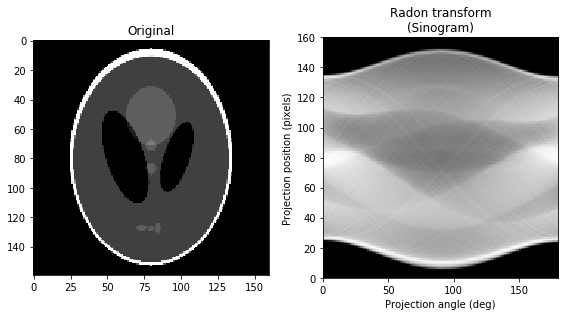

In [53]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, rescale

image = imread(data_dir + "/phantom.png", as_gray=True)
image = rescale(image, scale=0.4, mode='reflect', multichannel=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta, circle=True)
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

fig.tight_layout()
plt.show()

# 2. 원점에서의 sinogram

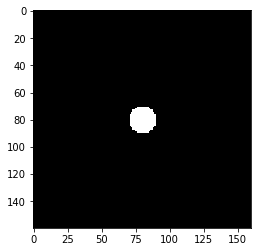

In [54]:
from skimage import draw


img = np.zeros((160, 160), dtype=np.float64)
rr, cc, = draw.circle(int((img.shape[0]) * .5), int(img.shape[0] * .5), 10)
img[rr, cc] = 1
plt.imshow(img, cmap=plt.cm.Greys_r)

<Figure size 432x288 with 0 Axes>

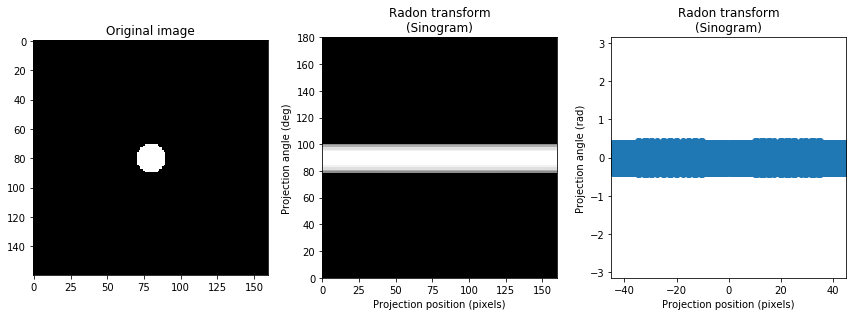

In [55]:
theta = np.linspace(0, 180, max(image.shape), endpoint=False)
sinogram = radon(img, theta=theta, circle=True)
r_count = ((sinogram.nonzero()[1]/80)-1)*45
theta_count = ((sinogram.nonzero()[0]/80)-1)*np.pi
sinogram = radon(img, theta=theta_count, circle=True)
plt.figure()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12,4.5))

ax1.set_title("Original image")
ax1.imshow(img, cmap = plt.cm.Greys_r)

ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection position (pixels)")
ax2.set_ylabel("Projection angle (deg)")
ax2.imshow(sinogram,cmap =plt.cm.Greys_r,
           extent = (0, sinogram.shape[0],0,180),aspect ='auto')

ax3.set_xlim([-45,45])
ax3.set_ylim([-np.pi, np.pi])
ax3.set_title("Radon transform\n(Sinogram)")
ax3.set_xlabel("Projection position (pixels)")
ax3.set_ylabel("Projection angle (rad)")

plt.scatter(r_count, theta_count)

fig.tight_layout()
plt.show()

# 3.  옆으로 조금 옮겼을때의 sinogram

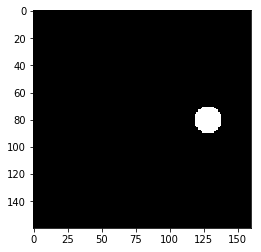

In [56]:

img2 = np.zeros((160, 160), dtype=np.float64)
rr, cc, = draw.circle(int((img2.shape[0]) * .5), int(img2.shape[0] * .8), 10)
img2[rr, cc] = 1
plt.imshow(img2, cmap=plt.cm.Greys_r)

<Figure size 432x288 with 0 Axes>

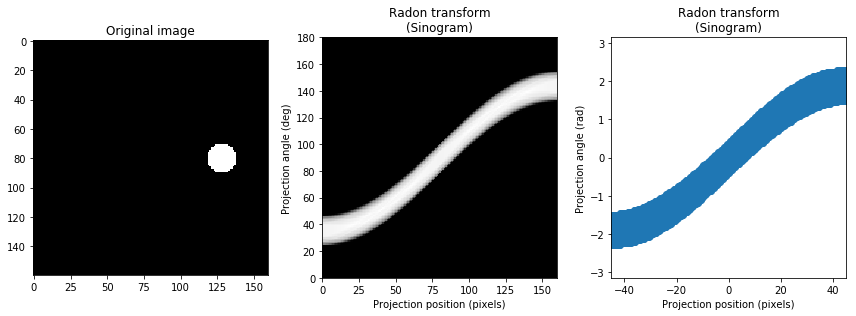

In [57]:
theta = np.linspace(0, 180, max(img2.shape), endpoint=False)
sinogram = radon(img2, theta=theta, circle=True)
r_count = ((sinogram.nonzero()[1]/80)-1)*45.5
theta_count = ((sinogram.nonzero()[0]/80)-1)*np.pi
plt.figure()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12,4.5))

ax1.set_title("Original image")
ax1.imshow(img2, cmap = plt.cm.Greys_r)

ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection position (pixels)")
ax2.set_ylabel("Projection angle (deg)")
ax2.imshow(sinogram,cmap =plt.cm.Greys_r,
           extent=(0, sinogram.shape[0],0,180),aspect ='auto')

ax3.set_xlim([-45,45])
ax3.set_ylim([-np.pi, np.pi])
ax3.set_title("Radon transform\n(Sinogram)")
ax3.set_xlabel("Projection position (pixels)")
ax3.set_ylabel("Projection angle (rad)")

plt.scatter(r_count, -theta_count)

fig.tight_layout()
plt.show()

# 4. 위에 데이터를 가지고 만들기

# Theta 값이 0인 것만 따로 추려내기 위해 for문을 돌림

In [58]:

Theta_zero=[]

for i in range(0,len(b)):

    if (b[:][i][2]== 0):
        Theta_zero.append((b[:][i][:]))
    

In [59]:
Theta_zero

[array([27.6381182 ,  1.17642157,  0.        ]),
 array([11.        ,  0.52359878,  0.        ]),
 array([-39.40415587,   1.57079633,   0.        ]),
 array([7.10542736e-15, 5.23598776e-01, 0.00000000e+00]),
 array([-2.27500000e+01, -4.05723995e-16,  0.00000000e+00]),
 array([ 5.46025271, -0.64389425,  0.        ]),
 array([-11.        ,  -0.52359878,   0.        ]),
 array([ 5.46025271, -0.64389425,  0.        ]),
 array([45.5       ,  1.04719755,  0.        ]),
 array([45.5       ,  1.04719755,  0.        ]),
 array([23.40539468, -1.28440435,  0.        ]),
 array([5.46025271, 0.4033033 , 0.        ]),
 array([-2.27500000e+01, -4.05723995e-16,  0.00000000e+00]),
 array([ 5.46025271, -0.4033033 ,  0.        ]),
 array([5.46025271, 0.4033033 , 0.        ]),
 array([-18.18189151,   0.11251613,   0.        ]),
 array([1.06581410e-14, 5.23598776e-01, 0.00000000e+00]),
 array([-18.18189151,   0.11251613,   0.        ]),
 array([18.18189151, -0.11251613,  0.        ]),
 array([5.46025271, 0

In [60]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, rescale


In [61]:
theta_zero_count = []

for i in range(0,len(Theta_zero)):
    theta_zero_count.append(Theta_zero[i][1])
    
theta_zero_count

[1.1764215659493535,
 0.5235987755982987,
 1.5707963267948966,
 0.5235987755982987,
 -4.0572399536883994e-16,
 -0.6438942525262533,
 -0.5235987755982991,
 -0.6438942525262533,
 1.0471975511965979,
 1.0471975511965979,
 -1.2844043500802422,
 0.40330329867034465,
 -4.0572399536883994e-16,
 -0.40330329867034503,
 0.40330329867034465,
 0.11251612989187651,
 0.5235987755982987,
 0.11251612989187651,
 -0.11251612989187691,
 0.40330329867034465,
 0.5235987755982987,
 0.0,
 1.3335895279112524,
 -4.0572399536883994e-16,
 1.4711749596597772,
 0.0,
 1.1764215659493538,
 1.5707963267948966,
 0.40330329867034465,
 1.0471975511965979,
 1.5707963267948963,
 0.40330329867034465,
 -4.0572399536883994e-16,
 0.5235987755982987,
 -0.5235987755982993,
 -0.40330329867034503,
 1.5707963267948966,
 1.5707963267948966,
 1.0471975511965976,
 1.5707963267948966,
 0.0,
 -4.191478699181444e-16,
 0.40330329867034465,
 1.4711749596597772,
 1.5707963267948966,
 0.6438942525262528,
 -0.6438942525262532,
 -1.0471975511

In [62]:
len(theta_zero_count)

83931

## radian으로 되어 있던걸 degree로 바꿔 줌

In [63]:
degree = []

for i in range(0,len(theta_zero_count)):
    degree.append(math.degrees(theta_zero_count[i]))
degree
    

[67.4039906570692,
 29.999999999999993,
 90.0,
 29.999999999999993,
 -2.3246272581819887e-14,
 -36.89242312248516,
 -30.000000000000018,
 -36.89242312248516,
 60.00000000000001,
 60.00000000000001,
 -73.59094844784136,
 23.107576877514855,
 -2.3246272581819887e-14,
 -23.107576877514877,
 23.107576877514855,
 6.446699369950288,
 29.999999999999993,
 6.446699369950288,
 -6.446699369950311,
 23.107576877514855,
 29.999999999999993,
 0.0,
 76.40905155215866,
 -2.3246272581819887e-14,
 84.29211611383437,
 0.0,
 67.4039906570692,
 90.0,
 23.107576877514855,
 60.00000000000001,
 89.99999999999999,
 23.107576877514855,
 -2.3246272581819887e-14,
 29.999999999999993,
 -30.000000000000025,
 -23.107576877514877,
 90.0,
 90.0,
 59.99999999999999,
 90.0,
 0.0,
 -2.401540393820811e-14,
 23.107576877514855,
 84.29211611383437,
 90.0,
 36.89242312248513,
 -36.892423122485155,
 -60.00000000000001,
 66.44669936995031,
 36.89242312248513,
 29.999999999999993,
 -36.89242312248516,
 -60.00000000000001,
 59.

In [64]:
len(degree)

83931

In [65]:
degrees = np.array(degree)
degrees

array([ 67.40399066,  30.        ,  90.        , ...,  90.        ,
        24.29211611, -38.69260323])

In [66]:
degrees.min()



-84.2921161138344

In [67]:
degrees.max()

90.0

In [68]:
degrees[degrees< 0 ] = degrees[degrees< 0 ]+ 180
degrees

array([ 67.40399066,  30.        ,  90.        , ...,  90.        ,
        24.29211611, 141.30739677])

In [69]:
degrees1 = []
for i in range(0,len(degrees)):
    degrees1.append(int(degrees[i]))
                    
degrees1

[67,
 29,
 90,
 29,
 179,
 143,
 149,
 143,
 60,
 60,
 106,
 23,
 179,
 156,
 23,
 6,
 29,
 6,
 173,
 23,
 29,
 0,
 76,
 179,
 84,
 0,
 67,
 90,
 23,
 60,
 89,
 23,
 179,
 29,
 149,
 156,
 90,
 90,
 59,
 90,
 0,
 179,
 23,
 84,
 90,
 36,
 143,
 120,
 66,
 36,
 29,
 143,
 120,
 59,
 16,
 53,
 90,
 172,
 23,
 90,
 120,
 29,
 158,
 120,
 90,
 179,
 90,
 7,
 59,
 127,
 172,
 81,
 136,
 149,
 36,
 43,
 120,
 53,
 150,
 172,
 90,
 149,
 23,
 29,
 6,
 120,
 29,
 95,
 90,
 90,
 166,
 6,
 89,
 60,
 149,
 59,
 90,
 76,
 36,
 149,
 143,
 89,
 143,
 23,
 67,
 95,
 141,
 46,
 90,
 90,
 29,
 66,
 149,
 73,
 95,
 76,
 119,
 0,
 84,
 149,
 84,
 136,
 6,
 43,
 90,
 95,
 126,
 81,
 29,
 23,
 120,
 16,
 143,
 36,
 0,
 120,
 76,
 89,
 120,
 90,
 29,
 29,
 144,
 23,
 67,
 81,
 149,
 23,
 23,
 173,
 90,
 23,
 120,
 23,
 84,
 90,
 136,
 179,
 90,
 0,
 149,
 52,
 113,
 90,
 84,
 16,
 23,
 90,
 0,
 76,
 166,
 143,
 0,
 59,
 60,
 179,
 150,
 144,
 21,
 172,
 53,
 23,
 81,
 90,
 90,
 29,
 23,
 84,
 81,
 16,
 81,

In [70]:
r_count = []

for i in range(0,len(c)):
    r_count.append(c[i][0])
    
r_count

[27.638118203690706,
 11.00000000000001,
 -39.40415587219196,
 7.105427357601002e-15,
 -22.750000000000007,
 5.460252711758628,
 -11.000000000000009,
 5.460252711758624,
 45.5,
 45.5,
 23.405394677296073,
 5.460252711758647,
 -22.750000000000007,
 5.460252711758628,
 5.460252711758647,
 -18.181891505152002,
 1.0658141036401503e-14,
 -18.181891505152002,
 18.181891505152,
 5.460252711758644,
 7.105427357601002e-15,
 22.750000000000004,
 40.539332752278995,
 -22.750000000000007,
 36.94614669504295,
 22.750000000000004,
 -27.6381182036907,
 44.904155872191964,
 5.460252711758644,
 45.50000000000001,
 44.904155872191964,
 -5.460252711758628,
 -22.750000000000007,
 11.00000000000001,
 -1.4210854715202004e-14,
 -5.460252711758649,
 44.904155872191964,
 -39.40415587219196,
 45.5,
 39.40415587219196,
 32.27627944162883,
 -32.27627944162883,
 5.460252711758647,
 36.94614669504295,
 39.404155872191964,
 -5.460252711758635,
 -5.4602527117586455,
 -22.75,
 18.181891505152,
 5.460252711758642,
 1.0

In [71]:
len(r_count)

83931

In [72]:
r_counts = np.array(r_count)
r_counts

array([ 27.6381182 ,  11.        , -39.40415587, ..., -39.40415587,
        36.9461467 , -42.38981678])

In [73]:
r_counts = np.array(r_count)
r_counts = r_counts+45.5
r_counts

array([73.1381182 , 56.5       ,  6.09584413, ...,  6.09584413,
       82.4461467 ,  3.11018322])

In [74]:
r_counts.max()

91.0

In [75]:
r_counts.min()

0.0

In [76]:
image = np.zeros((180,92), dtype=np.float64)

In [77]:
image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [78]:
for i in range(0,len(r_counts)):
    image[int(degrees1[i])][int(r_counts[i])] = image[int(degrees1[i])][int(r_counts[i])] + 1 

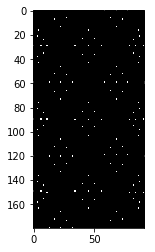

In [79]:
plt.imshow(image, cmap=plt.cm.Greys_r,vmax=1)

<Figure size 432x288 with 0 Axes>

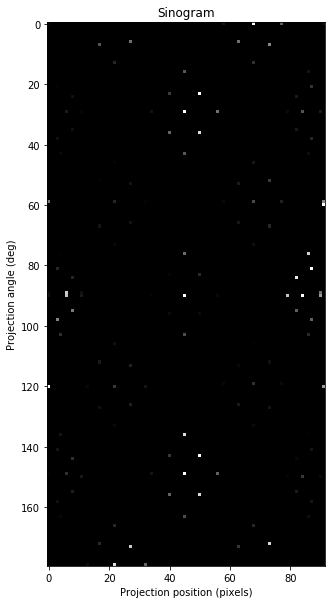

In [126]:
plt.figure()
fig, (ax1) = plt.subplots(1, 1, figsize = (12,10))
ax1.set_title("Sinogram")
ax1.set_xlabel("Projection position (pixels)")
ax1.set_ylabel("Projection angle (deg)")
plt.imshow(image, cmap=plt.cm.Greys_r, vmax=2000)

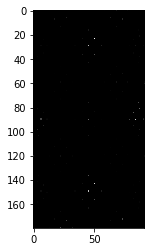

In [81]:
plt.imshow(image, cmap=plt.cm.Greys_r)

<Figure size 432x288 with 0 Axes>

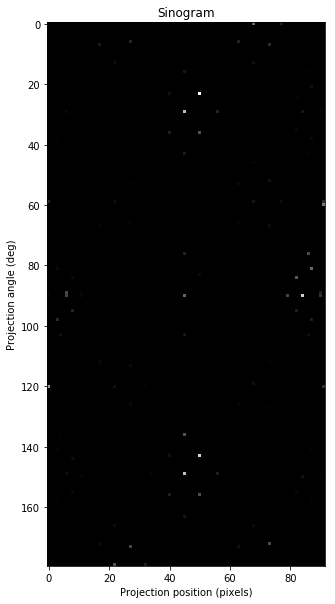

In [128]:
plt.figure()
fig, (ax1) = plt.subplots(1, 1, figsize = (12,10))
ax1.set_title("Sinogram")
ax1.set_xlabel("Projection position (pixels)")
ax1.set_ylabel("Projection angle (deg)")
plt.imshow(image, cmap=plt.cm.Greys_r)

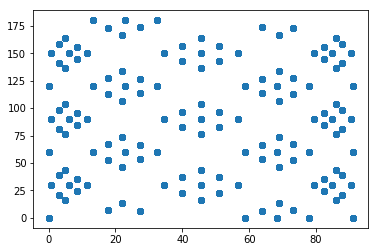

In [83]:

plt.scatter(r_counts,degrees)

# Intensity를 한눈에 보기위해서 5 degree로 잘라 보았다

In [84]:
int_degrees1 = np.array(degrees1)
int_degrees1

array([ 67,  29,  90, ...,  89,  24, 141])

In [85]:
degrees2 = int_degrees1/5

degrees3 =[]
for i in range(0,len(degrees2)):
    degrees3.append(int(degrees2[i]))
degrees3

[13,
 5,
 18,
 5,
 35,
 28,
 29,
 28,
 12,
 12,
 21,
 4,
 35,
 31,
 4,
 1,
 5,
 1,
 34,
 4,
 5,
 0,
 15,
 35,
 16,
 0,
 13,
 18,
 4,
 12,
 17,
 4,
 35,
 5,
 29,
 31,
 18,
 18,
 11,
 18,
 0,
 35,
 4,
 16,
 18,
 7,
 28,
 24,
 13,
 7,
 5,
 28,
 24,
 11,
 3,
 10,
 18,
 34,
 4,
 18,
 24,
 5,
 31,
 24,
 18,
 35,
 18,
 1,
 11,
 25,
 34,
 16,
 27,
 29,
 7,
 8,
 24,
 10,
 30,
 34,
 18,
 29,
 4,
 5,
 1,
 24,
 5,
 19,
 18,
 18,
 33,
 1,
 17,
 12,
 29,
 11,
 18,
 15,
 7,
 29,
 28,
 17,
 28,
 4,
 13,
 19,
 28,
 9,
 18,
 18,
 5,
 13,
 29,
 14,
 19,
 15,
 23,
 0,
 16,
 29,
 16,
 27,
 1,
 8,
 18,
 19,
 25,
 16,
 5,
 4,
 24,
 3,
 28,
 7,
 0,
 24,
 15,
 17,
 24,
 18,
 5,
 5,
 28,
 4,
 13,
 16,
 29,
 4,
 4,
 34,
 18,
 4,
 24,
 4,
 16,
 18,
 27,
 35,
 18,
 0,
 29,
 10,
 22,
 18,
 16,
 3,
 4,
 18,
 0,
 15,
 33,
 28,
 0,
 11,
 12,
 35,
 30,
 28,
 4,
 34,
 10,
 4,
 16,
 18,
 18,
 5,
 4,
 16,
 16,
 3,
 16,
 28,
 25,
 24,
 4,
 11,
 35,
 18,
 24,
 5,
 5,
 18,
 11,
 10,
 31,
 27,
 15,
 4,
 13,
 29,
 23,
 29,
 4,

In [86]:
int_degrees3 = np.array(degrees3)
int_degrees3

array([13,  5, 18, ..., 17,  4, 28])

In [87]:
degrees4 = int_degrees3*5
degrees4
#5 도 간격으로 convert 한것

array([ 65,  25,  90, ...,  85,  20, 140])

In [88]:
int_degrees3.max()

35

In [89]:
int_degrees3.min()

0

## 5도 간격으로 해서 intensity 확인해보려고 int_degrees3를 만들어봄

In [90]:
image1 = np.zeros((36,92), dtype=np.float64)
image1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [91]:
for i in range(0,len(r_counts)):
    image1[int_degrees3[i]][int(r_counts[i]-1)] = image1[int_degrees3[i]][int(r_counts[i]-1)] + 1 
    

<Figure size 432x288 with 0 Axes>

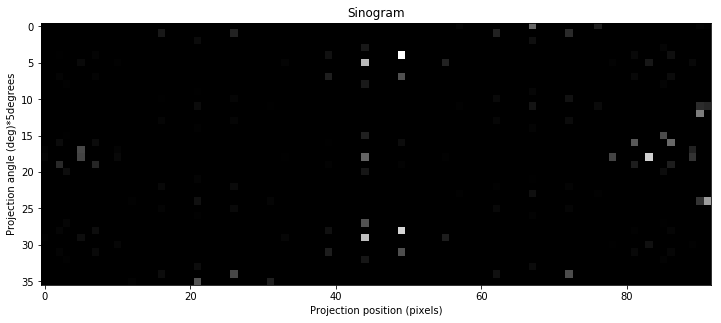

In [92]:
plt.figure()
fig, (ax2) = plt.subplots(1, 1, figsize = (12,10))
ax2.set_title("Sinogram")
ax2.set_xlabel("Projection position (pixels)")
ax2.set_ylabel("Projection angle (deg)*5degrees")
plt.imshow(image1, cmap=plt.cm.Greys_r)

<Figure size 432x288 with 0 Axes>

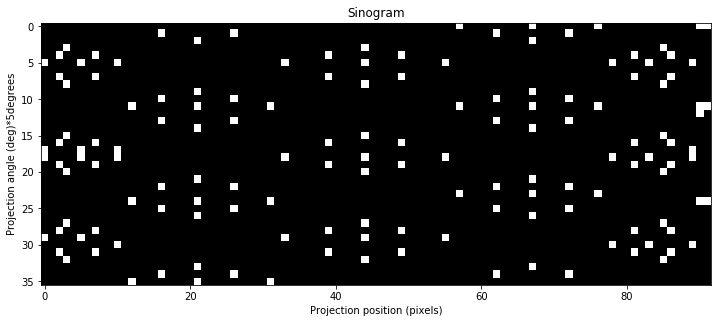

In [93]:
plt.figure()
fig, (ax2) = plt.subplots(1, 1, figsize = (12,10))
ax2.set_title("Sinogram")
ax2.set_xlabel("Projection position (pixels)")
ax2.set_ylabel("Projection angle (deg)*5degrees")
plt.imshow(image1, cmap=plt.cm.Greys_r,vmax=1)

# Theta가 0이 아닌 Indirect plane 포함한 sinogram 만들어보기

In [94]:

Theta_total=[]

for i in range(0,len(b)):
    Theta_total.append((b[i][1]))
    
Theta_total
    

[1.1764215659493535,
 0.5235987755982987,
 1.5707963267948966,
 0.5235987755982987,
 -4.0572399536883994e-16,
 -0.6438942525262533,
 -0.5235987755982993,
 -0.5235987755982991,
 -0.6438942525262533,
 1.0471975511965979,
 1.0471975511965979,
 -1.2844043500802422,
 0.40330329867034465,
 -4.0572399536883994e-16,
 -0.40330329867034503,
 0.40330329867034465,
 0.11251612989187651,
 0.5235987755982987,
 0.11251612989187651,
 -0.11251612989187691,
 0.40330329867034465,
 1.5707963267948966,
 -0.11251612989187733,
 1.5707963267948966,
 0.5235987755982987,
 0.0,
 1.3335895279112524,
 -4.0572399536883994e-16,
 1.4711749596597772,
 0.0,
 1.1764215659493538,
 1.5707963267948966,
 0.40330329867034465,
 1.0471975511965979,
 1.5707963267948963,
 0.40330329867034465,
 -4.0572399536883994e-16,
 -1.0471975511965979,
 0.5235987755982987,
 -0.5235987755982993,
 -0.40330329867034503,
 1.5707963267948966,
 1.3335895279112522,
 1.5707963267948966,
 1.0471975511965976,
 1.5707963267948966,
 0.0,
 -4.191478699181

In [95]:
Theta_total_count = np.array(Theta_total)
Theta_total_count

array([ 1.17642157,  0.52359878,  1.57079633, ...,  1.57079633,
        0.42397741, -0.67531332])

In [96]:
Theta_total_count[Theta_total_count< 0 ] = Theta_total_count[Theta_total_count< 0 ] +math.pi/2
Theta_total_count

array([1.17642157, 0.52359878, 1.57079633, ..., 1.57079633, 0.42397741,
       0.895483  ])

In [97]:
Theta_total_count=Theta_total_count*100


# radian으로 이미지 매핑하기 위해 100을 곱해서 진행

In [98]:
Theta_total_count.max()  #math.pi 랑 같은 값

157.07963267948966

In [99]:
Theta_total_count.min()

0.0

In [100]:
r_count_total = []

for i in range(0,len(b)):
    r_count_total.append(b[i][0])
    
r_count_total

[27.638118203690706,
 11.00000000000001,
 -39.40415587219196,
 7.105427357601002e-15,
 -22.750000000000007,
 5.460252711758628,
 -1.4210854715202004e-14,
 -11.000000000000009,
 5.460252711758624,
 45.5,
 45.5,
 23.405394677296073,
 5.460252711758647,
 -22.750000000000007,
 5.460252711758628,
 5.460252711758647,
 -18.181891505152002,
 1.0658141036401503e-14,
 -18.181891505152002,
 18.181891505152,
 5.460252711758644,
 33.90415587219196,
 -18.181891505152002,
 -39.40415587219196,
 7.105427357601002e-15,
 22.750000000000004,
 40.539332752278995,
 -22.750000000000007,
 36.94614669504295,
 22.750000000000004,
 -27.6381182036907,
 44.904155872191964,
 5.460252711758644,
 45.50000000000001,
 44.904155872191964,
 -5.460252711758628,
 -22.750000000000007,
 45.5,
 11.00000000000001,
 -1.4210854715202004e-14,
 -5.460252711758649,
 44.904155872191964,
 -40.53933275227898,
 -39.40415587219196,
 45.5,
 39.40415587219196,
 32.27627944162883,
 -32.27627944162883,
 5.460252711758647,
 36.94614669504295

In [101]:
r_counts_total= np.array(r_count_total)
r_counts_total = r_counts_total+45.5
r_counts_total

array([73.1381182 , 56.5       ,  6.09584413, ...,  6.09584413,
       82.4461467 ,  3.11018322])

In [102]:
len(r_counts_total)

94125

In [103]:
len(Theta_total_count)

94125

In [104]:
image3 = np.zeros((158,92), dtype=np.float64)

In [105]:
image3

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [118]:
image3.max()

6522.0

In [119]:
image3.min()

0.0

In [108]:
image3 = np.zeros((158,92), dtype=np.float64)

image3 = np.zeros((180,92), dtype=np.float64)

In [109]:
for i in range(0,len(r_counts_total)):
    image3[int(Theta_total_count[i]-1)][int(r_counts_total[i])] = image3[int(Theta_total_count[i])-1][int(r_counts_total[i])] + 1 

문제 발생 라디안으로 할시 np.array로 이미지 맵핑을 하기 때문에 정수로 들어가면서 소수점 자리가 많이 잃어버리기 떄문에 잘 안됨

100을 곱해서 맵핑 

In [110]:
image3

array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [ 298.,    0.,    0., ...,    0., 1986.,    0.],
       [  70.,    0.,    0., ...,    0.,    0.,  119.]])

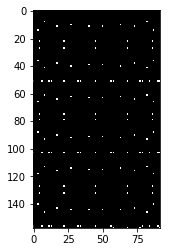

In [111]:
plt.imshow(image3, cmap=plt.cm.Greys_r,vmax=1)

<Figure size 432x288 with 0 Axes>

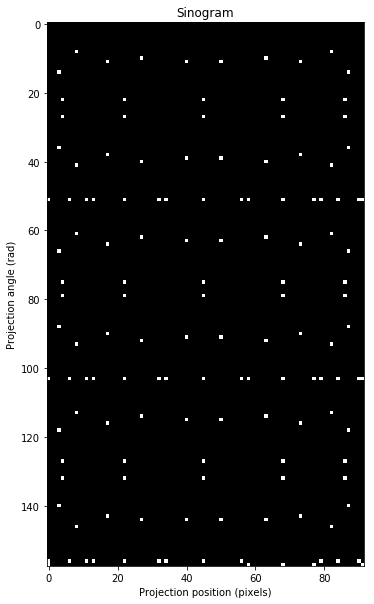

In [112]:
plt.figure()
fig, (ax3) = plt.subplots(1, 1, figsize = (12,10))
ax3.set_title("Sinogram")
ax3.set_xlabel("Projection position (pixels)")
ax3.set_ylabel("Projection angle (rad)")
plt.imshow(image3, cmap=plt.cm.Greys_r,vmax= 22)

In [113]:
image3.max()

6522.0

<Figure size 432x288 with 0 Axes>

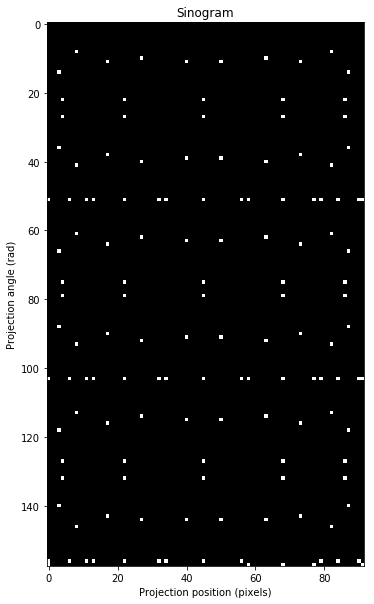

In [114]:
plt.figure()
fig, (ax3) = plt.subplots(1, 1, figsize = (12,10))
ax3.set_title("Sinogram")
ax3.set_xlabel("Projection position (pixels)")
ax3.set_ylabel("Projection angle (rad)")
plt.imshow(image3, cmap=plt.cm.Greys_r,vmax =1 )

In [115]:
image3.max()

6522.0

---
---
---

---
---
---

히스토그램으로 검증


(array([13380.,  2377.,  3533.,  4683.,  9308., 23879.,  4085.,  4273.,
         6110., 22497.]),
 array([ 0. ,  9.1, 18.2, 27.3, 36.4, 45.5, 54.6, 63.7, 72.8, 81.9, 91. ]),
 <a list of 10 Patch objects>)

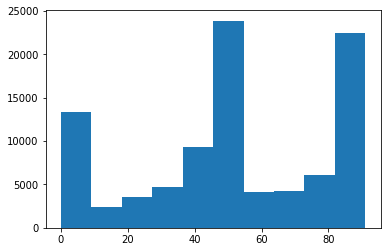

In [116]:
plt.hist(r_counts_total)

In [117]:
len(Theta_total_count[(Theta_total_count < ) & (Theta_total_count >= 5)])

SyntaxError: invalid syntax (<ipython-input-117-775e9ec67a49>, line 1)

In [ ]:
Theta_total_count.max()

In [ ]:
math.radians(5)

In [ ]:
math.radians(10)

In [ ]:

d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= 0.08726646259971647)&(c[:][i][1] < 0.17453292519943295):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

In [ ]:
d1 = []

for i in range(0,len(d)):
    d1.append(d[i][0])
    
    
d1

In [ ]:
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

# 0<Phi <5 


In [ ]:
plt.hist(d2)

# 5<Phi<10

In [ ]:
plt.hist(d2)

# 10<Phi<15

In [ ]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)

# 15<Phi <20

In [ ]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)

# 20<Phi<25

In [ ]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)

# 25< Phi <30

In [ ]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)

# 30<Phi<35

In [ ]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)


# 35< Phi <40

In [ ]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)


# 40< Phi <45

In [ ]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)


# 45< Phi < 50

In [ ]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)


# 50< Phi < 55

In [ ]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)


# 55< Phi < 60

In [ ]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)


# 175<Phi<180

In [ ]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)
